In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import geopandas as gpd
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

%matplotlib inline

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
## Forest Fires

data_ff_india = pd.read_csv('forest_fires.csv',dtype=object)
data_ff_india['2008-09'] = data_ff_india['2008-09'].astype(np.int)
data_ff_india['2009-10'] = data_ff_india['2009-10'].astype(np.int)
data_ff_india['2010-2011'] = data_ff_india['2010-2011'].astype(np.int)

data_ff_india.rename(columns={'State Name':'st_nm'},inplace=True)

data_ff_india_2008 = data_ff_india.copy(deep=True)
data_ff_india_2008.rename(columns={'2008-09':'ff'},inplace=True)

data_ff_india_2009 = data_ff_india.copy(deep=True)                                   
data_ff_india_2009.rename(columns={'2009-10':'ff'},inplace=True)

data_ff_india_2010 = data_ff_india.copy(deep=True)
data_ff_india_2010.rename(columns={'2010-2011':'ff'},inplace=True)
                                   

data_ff_india_2008.drop(columns={'2009-10','2010-2011','lat','lon'},inplace=True)
data_ff_india_2009.drop(columns={'2008-09','2010-2011','lat','lon'},inplace=True)
data_ff_india_2010.drop(columns={'2008-09','2009-10','lat','lon'},inplace=True)

data_ff_india_2010.head()

,st_nm,ff
0,Andaman and Nicobar Islands,0
1,Andhra Pradesh,1119
2,Arunachal Pradesh,485
3,Assam,1322
4,Bihar,81


In [4]:
## Forest Cover

data_fc_india = pd.read_csv('forest_cover.csv',dtype=object)
data_fc_india['2009'] = data_fc_india['2009'].astype(np.float)
data_fc_india['2011'] = data_fc_india['2011'].astype(np.float)
data_fc_india['2013'] = data_fc_india['2013'].astype(np.float)
data_fc_india['2015'] = data_fc_india['2015'].astype(np.float)
data_fc_india.rename(columns={'State':'st_nm'},inplace=True)

data_fc_india_2009 = data_fc_india.copy(deep=True)
data_fc_india_2009.rename(columns={'2009':'fc'},inplace=True)

data_fc_india_2011 = data_fc_india.copy(deep=True)
data_fc_india_2011.rename(columns={'2011':'fc'},inplace=True)

data_fc_india_2013 = data_fc_india.copy(deep=True)
data_fc_india_2013.rename(columns={'2013':'fc'},inplace=True)

data_fc_india_2015 = data_fc_india.copy(deep=True)
data_fc_india_2015.rename(columns={'2015':'fc'},inplace=True)

data_fc_india_2009.drop(columns={'2011','2013','2015','e1','e2','e3','e4'},inplace=True)
data_fc_india_2011.drop(columns={'2009','2013','2015','e1','e2','e3','e4'},inplace=True)
data_fc_india_2013.drop(columns={'2009','2011','2015','e1','e2','e3','e4'},inplace=True)
data_fc_india_2015.drop(columns={'2009','2011','2013','e1','e2','e3','e4'},inplace=True)
data_fc_india_2015.head()

,st_nm,fc
0,Andaman and Nicobar Islands,6751.0
1,Andhra Pradesh,24424.0
2,Arunachal Pradesh,67248.0
3,Assam,27623.0
4,Bihar,7288.0


In [5]:
## Ground water level (distance from surface to water level in m)

def st_nm_trnsfm(st_nm):
    st_nm=st_nm.replace('&','and')
    t=st_nm.split(sep=' ')
    for i in range(len(t)):
        t[i] = t[i].lower()
        if t[i]!='and':
            t[i]=t[i].capitalize()
    st_nm1=' '.join(t)
    return st_nm1


data_gw_india = pd.read_csv('groundwater_full.csv')
data_gw_india['2008gw'] = data_gw_india['2008gw'].astype(np.float)
data_gw_india['2009gw'] = data_gw_india['2009gw'].astype(np.float)
data_gw_india['2010gw'] = data_gw_india['2010gw'].astype(np.float)
data_gw_india['2011gw'] = data_gw_india['2011gw'].astype(np.float)
data_gw_india['2012gw'] = data_gw_india['2012gw'].astype(np.float)
data_gw_india['2013gw'] = data_gw_india['2013gw'].astype(np.float)
data_gw_india['2014gw'] = data_gw_india['2014gw'].astype(np.float)
data_gw_india['2015gw'] = data_gw_india['2015gw'].astype(np.float)

data_gw_india['State']=data_gw_india['State'].transform(st_nm_trnsfm)
data_gw_india.rename(columns={'State':'st_nm'},inplace=True)

data_gw_india_2008 = data_gw_india.copy(deep=True)
data_gw_india_2008.rename(columns={'2008gw':'gw'},inplace=True)

data_gw_india_2009 = data_gw_india.copy(deep=True)
data_gw_india_2009.rename(columns={'2009gw':'gw'},inplace=True)

data_gw_india_2010 = data_gw_india.copy(deep=True)
data_gw_india_2010.rename(columns={'2010gw':'gw'},inplace=True)

data_gw_india_2011 = data_gw_india.copy(deep=True)
data_gw_india_2011.rename(columns={'2011gw':'gw'},inplace=True)

data_gw_india_2012 = data_gw_india.copy(deep=True)
data_gw_india_2012.rename(columns={'2012gw':'gw'},inplace=True)

data_gw_india_2013 = data_gw_india.copy(deep=True)
data_gw_india_2013.rename(columns={'2013gw':'gw'},inplace=True)

data_gw_india_2014 = data_gw_india.copy(deep=True)
data_gw_india_2014.rename(columns={'2014gw':'gw'},inplace=True)

data_gw_india_2015 = data_gw_india.copy(deep=True)
data_gw_india_2015.rename(columns={'2015gw':'gw'},inplace=True)


data_gw_india_2008.drop(columns={'2009gw','2010gw','2011gw','2012gw','2013gw','2014gw','2015gw'},inplace=True)
data_gw_india_2009.drop(columns={'2008gw','2010gw','2011gw','2012gw','2013gw','2014gw','2015gw'},inplace=True)
data_gw_india_2010.drop(columns={'2008gw','2009gw','2011gw','2012gw','2013gw','2014gw','2015gw'},inplace=True)
data_gw_india_2011.drop(columns={'2008gw','2009gw','2010gw','2012gw','2013gw','2014gw','2015gw'},inplace=True)
data_gw_india_2012.drop(columns={'2008gw','2009gw','2010gw','2011gw','2013gw','2014gw','2015gw'},inplace=True)
data_gw_india_2013.drop(columns={'2008gw','2009gw','2010gw','2011gw','2012gw','2014gw','2015gw'},inplace=True)
data_gw_india_2014.drop(columns={'2008gw','2009gw','2010gw','2011gw','2012gw','2013gw','2015gw'},inplace=True)
data_gw_india_2015.drop(columns={'2008gw','2009gw','2010gw','2011gw','2012gw','2013gw','2014gw'},inplace=True)

data_gw_india_2015

,st_nm,gw
0,Uttarakhand,14.48
1,Assam,4.72
2,Ladakh,NaN
3,Goa,6.42
4,Lakshadweep,NaN
5,Puducherry,11.43
6,Delhi,17.62
7,Himachal Pradesh,7.46
8,Tripura,4.60
9,Andhra Pradesh,13.15


In [17]:
## Total Rainfall (mm)

data_rf_india = pd.read_csv('rainfall_full.csv')

data_rf_india['2008rf'] = data_rf_india['2008rf'].astype(np.float)
data_rf_india['2009rf'] = data_rf_india['2009rf'].astype(np.float)
data_rf_india['2010rf'] = data_rf_india['2010rf'].astype(np.float)
data_rf_india['2011rf'] = data_rf_india['2011rf'].astype(np.float)
data_rf_india['2012rf'] = data_rf_india['2012rf'].astype(np.float)
data_rf_india['2013rf'] = data_rf_india['2013rf'].astype(np.float)
data_rf_india['2014rf'] = data_rf_india['2014rf'].astype(np.float)
data_rf_india['2015rf'] = data_rf_india['2015rf'].astype(np.float)

data_rf_india['State']=data_rf_india['State'].transform(st_nm_trnsfm)
data_rf_india.rename(columns={'State':'st_nm'},inplace=True)

data_rf_india_2008 = data_rf_india.copy(deep=True)
data_rf_india_2008.rename(columns={'2008rf':'rf'},inplace=True)

data_rf_india_2009 = data_rf_india.copy(deep=True)
data_rf_india_2009.rename(columns={'2009rf':'rf'},inplace=True)

data_rf_india_2010 = data_rf_india.copy(deep=True)
data_rf_india_2010.rename(columns={'2010rf':'rf'},inplace=True)

data_rf_india_2011 = data_rf_india.copy(deep=True)
data_rf_india_2011.rename(columns={'2011rf':'rf'},inplace=True)

data_rf_india_2012 = data_rf_india.copy(deep=True)
data_rf_india_2012.rename(columns={'2012rf':'rf'},inplace=True)

data_rf_india_2013 = data_rf_india.copy(deep=True)
data_rf_india_2013.rename(columns={'2013rf':'rf'},inplace=True)

data_rf_india_2014 = data_rf_india.copy(deep=True)
data_rf_india_2014.rename(columns={'2014rf':'rf'},inplace=True)

data_rf_india_2015 = data_rf_india.copy(deep=True)
data_rf_india_2015.rename(columns={'2015rf':'rf'},inplace=True)


data_rf_india_2008.drop(columns={'2009rf','2010rf','2011rf','2012rf','2013rf','2014rf','2015rf'},inplace=True)
data_rf_india_2009.drop(columns={'2008rf','2010rf','2011rf','2012rf','2013rf','2014rf','2015rf'},inplace=True)
data_rf_india_2010.drop(columns={'2008rf','2009rf','2011rf','2012rf','2013rf','2014rf','2015rf'},inplace=True)
data_rf_india_2011.drop(columns={'2008rf','2009rf','2010rf','2012rf','2013rf','2014rf','2015rf'},inplace=True)
data_rf_india_2012.drop(columns={'2008rf','2009rf','2010rf','2011rf','2013rf','2014rf','2015rf'},inplace=True)
data_rf_india_2013.drop(columns={'2008rf','2009rf','2010rf','2011rf','2012rf','2014rf','2015rf'},inplace=True)
data_rf_india_2014.drop(columns={'2008rf','2009rf','2010rf','2011rf','2012rf','2013rf','2015rf'},inplace=True)
data_rf_india_2015.drop(columns={'2008rf','2009rf','2010rf','2011rf','2012rf','2013rf','2014rf'},inplace=True)

data_rf_india_2015


,st_nm,rf
0,Uttarakhand,1569.70
1,Assam,2272.49
2,Ladakh,NaN
3,Goa,3045.20
4,Lakshdweep,NaN
5,Pondicherry,1363.20
6,Delhi,794.00
7,Himachal Pradesh,1322.81
8,Tripura,2361.35
9,Andhra Pradesh,869.52


In [7]:
## Mean temperature (degree celsius)

data_mt_india_2008 = pd.read_csv('mean_temp_2008.csv')
data_mt_india_2008['Mean_temp'] = data_mt_india_2008['Mean_temp'].astype(np.float)
data_mt_india_2008.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

data_mt_india_2009 = pd.read_csv('mean_temp_2009.csv')
data_mt_india_2009['Mean_temp'] = data_mt_india_2009['Mean_temp'].astype(np.float)
data_mt_india_2009.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

data_mt_india_2010 = pd.read_csv('mean_temp_2010.csv')
data_mt_india_2010['Mean_temp'] = data_mt_india_2010['Mean_temp'].astype(np.float)
data_mt_india_2010.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

data_mt_india_2011 = pd.read_csv('mean_temp_2011.csv')
data_mt_india_2011['Mean_temp'] = data_mt_india_2011['Mean_temp'].astype(np.float)
data_mt_india_2011.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

data_mt_india_2012 = pd.read_csv('mean_temp_2012.csv')
data_mt_india_2012['Mean_temp'] = data_mt_india_2012['Mean_temp'].astype(np.float)
data_mt_india_2012.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

data_mt_india_2013 = pd.read_csv('mean_temp_2010.csv')
data_mt_india_2013['Mean_temp'] = data_mt_india_2013['Mean_temp'].astype(np.float)
data_mt_india_2013.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

data_mt_india_2014 = pd.read_csv('mean_temp_2014.csv')
data_mt_india_2014['Mean_temp'] = data_mt_india_2014['Mean_temp'].astype(np.float)
data_mt_india_2014.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

data_mt_india_2015 = pd.read_csv('mean_temp_2015.csv')
data_mt_india_2015['Mean_temp'] = data_mt_india_2015['Mean_temp'].astype(np.float)
data_mt_india_2015.rename(columns={'State':'st_nm','Mean_temp':'meanT'},inplace=True)

In [8]:
## Max temperature (degree celsius)

data_maxt_india_2008 = pd.read_csv('max_temp_2008.csv')
data_maxt_india_2008['Max_temp'] = data_maxt_india_2008['Max_temp'].astype(np.float)
data_maxt_india_2008.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

data_maxt_india_2009 = pd.read_csv('max_temp_2009.csv')
data_maxt_india_2009['Max_temp'] = data_maxt_india_2009['Max_temp'].astype(np.float)
data_maxt_india_2009.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

data_maxt_india_2010 = pd.read_csv('max_temp_2010.csv')
data_maxt_india_2010['Max_temp'] = data_maxt_india_2010['Max_temp'].astype(np.float)
data_maxt_india_2010.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

data_maxt_india_2011 = pd.read_csv('max_temp_2011.csv')
data_maxt_india_2011['Max_temp'] = data_maxt_india_2011['Max_temp'].astype(np.float)
data_maxt_india_2011.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

data_maxt_india_2012 = pd.read_csv('max_temp_2012.csv')
data_maxt_india_2012['Max_temp'] = data_maxt_india_2012['Max_temp'].astype(np.float)
data_maxt_india_2012.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

data_maxt_india_2013 = pd.read_csv('max_temp_2013.csv')
data_maxt_india_2013['Max_temp'] = data_maxt_india_2013['Max_temp'].astype(np.float)
data_maxt_india_2013.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

data_maxt_india_2014 = pd.read_csv('max_temp_2014.csv')
data_maxt_india_2014['Max_temp'] = data_maxt_india_2014['Max_temp'].astype(np.float)
data_maxt_india_2014.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

data_maxt_india_2015 = pd.read_csv('max_temp_2015.csv')
data_maxt_india_2015['Max_temp'] = data_maxt_india_2015['Max_temp'].astype(np.float)
data_maxt_india_2015.rename(columns={'State':'st_nm','Max_temp':'maxT'},inplace=True)

In [9]:
fp = r'india-polygon.shp'
sf_india = gpd.read_file(fp)
sf_india.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [19]:
merged1 = sf_india.merge(data_ff_india_2009, on = 'st_nm', how = 'left')
merged2 = merged1.merge(data_fc_india_2009,on='st_nm',how='left')
merged3 = merged2.merge(data_gw_india_2009,on='st_nm',how='left')
merged4 = merged3.merge(data_rf_india_2009,on='st_nm',how='left')
merged5 = merged4.merge(data_mt_india_2009,on='st_nm',how='left')
merged_2009 = merged5.merge(data_maxt_india_2009,on='st_nm',how='left')
#merged_2009['NormCases'] = merged_2009['ff']/merged_2009['2009fc']
merged_2009.head()

merged1 = sf_india.merge(data_ff_india_2011, on = 'st_nm', how = 'left')
merged2 = merged1.merge(data_fc_india_2011,on='st_nm',how='left')
merged3 = merged2.merge(data_gw_india_2011,on='st_nm',how='left')
merged4 = merged3.merge(data_rf_india_2011,on='st_nm',how='left')
merged5 = merged4.merge(data_mt_india_2011,on='st_nm',how='left')
merged_2011 = merged5.merge(data_maxt_india_2011,on='st_nm',how='left')
#merged_2009['NormCases'] = merged_2009['ff']/merged_2009['2009fc']
merged_2011.head()

#merged1 = sf_india.merge(data_ff_india_2013, on = 'st_nm', how = 'left')
#merged2 = merged1.merge(data_fc_india_2013,on='st_nm',how='left')
#merged3 = merged2.merge(data_gw_india_2013,on='st_nm',how='left')
#merged4 = merged3.merge(data_rf_india_2013,on='st_nm',how='left')
#merged5 = merged4.merge(data_mt_india_2013,on='st_nm',how='left')
#merged_2013 = merged5.merge(data_maxt_india_2013,on='st_nm',how='left')
##merged_2009['NormCases'] = merged_2009['ff']/merged_2009['2009fc']
#merged_2013.head()

NameError: name 'data_ff_india_2011' is not defined

In [12]:
## Forest Fires
## (maps produced using the code given in the link https://medium.com/analytics-vidhya/generate-an-interactive-choropleth-india-map-using-corona-virus-covid-19-pandemic-data-with-bokeh-5623e974e585)

#Read data to json
merged_json = json.loads(merged_2009.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = merged_2009['ff'].min(), high = merged_2009['ff'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
#tick_labels = {'>2000': '2000'}

#Add hover tool
hover = HoverTool(tooltips = [ ('State','@st_nm'),('Cases','@ff')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 850,
                     border_line_color=None,location = (0,0), orientation = 'vertical')
#Create figure object.
p = figure(title = 'Number of Forest Fires', plot_height = 640 , plot_width = 680, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'ff', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'right')


#Display plot
show(p)

In [14]:
## Forest Cover

#Read data to json
merged_json = json.loads(merged_2009.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = merged_2009['fc'].min(), high = merged_2009['fc'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
#tick_labels = {'>2000': '2000'}

#Add hover tool
hover = HoverTool(tooltips = [ ('State','@st_nm'),('Forest Cover','@fc')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 850,
                     border_line_color=None,location = (0,0), orientation = 'vertical')
#Create figure object.
p = figure(title = 'Forest Cover (km$^2$)', plot_height = 640 , plot_width = 680, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'fc', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'right')


#Display plot
show(p)

In [15]:
## Ground Water level

#Read data to json
merged_json = json.loads(merged_2009.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = merged_2009['gw'].min(), high = merged_2009['gw'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
#tick_labels = {'>2000': '2000'}

#Add hover tool
hover = HoverTool(tooltips = [ ('State','@st_nm'),('Ground Water','@gw')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 850,
                     border_line_color=None,location = (0,0), orientation = 'vertical')
#Create figure object.
p = figure(title = 'Ground Water level 2009 (m)', plot_height = 640 , plot_width = 680, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'gw', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'right')


#Display plot
show(p)

In [20]:
## Rainfall

#Read data to json
merged_json = json.loads(merged_2009.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = merged_2009['rf'].min(), high = merged_2009['rf'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
#tick_labels = {'>2000': '2000'}

#Add hover tool
hover = HoverTool(tooltips = [ ('State','@st_nm'),('Rainfall','@rf')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 850,
                     border_line_color=None,location = (0,0), orientation = 'vertical')
#Create figure object.
p = figure(title = 'Total Rainfall 2009 (mm)', plot_height = 640 , plot_width = 680, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'rf', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'right')


#Display plot
show(p)

In [22]:
## Mean temperature

#Read data to json
merged_json = json.loads(merged_2009.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = merged_2009['meanT'].min(), high = merged_2009['meanT'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
#tick_labels = {'>2000': '2000'}

#Add hover tool
hover = HoverTool(tooltips = [ ('State','@st_nm'),('Mean Temp.','@meanT')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 850,
                     border_line_color=None,location = (0,0), orientation = 'vertical')
#Create figure object.
p = figure(title = 'Mean Temperature 2009 (degree celsius)', plot_height = 640 , plot_width = 680, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'meanT', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'right')


#Display plot
show(p)

In [23]:
## Max temperature

#Read data to json
merged_json = json.loads(merged_2009.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = merged_2009['maxT'].min(), high = merged_2009['maxT'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
#tick_labels = {'>2000': '2000'}

#Add hover tool
hover = HoverTool(tooltips = [ ('State','@st_nm'),('Max. Temp.','@maxT')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 850,
                     border_line_color=None,location = (0,0), orientation = 'vertical')
#Create figure object.
p = figure(title = 'Max Temperature 2009 (degree celsius)', plot_height = 640 , plot_width = 680, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'maxT', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'right')


#Display plot
show(p)

In [364]:
# generating the mean temp. file

f = open('mean_temp_2015.csv','w')
file1 = pd.read_csv('Temp_grids_in_India.csv')
file2 = pd.read_csv('temp_mean_usable_coordinates_no_imputation_2015.csv')
f.write('State,Mean_temp\n')
for name in sf_india['st_nm']:
    lat = file1['Lat'][file1['NAME_1']==name]
    lon = file1['Long'][file1['NAME_1']==name]

    text = []
    for i in lat.index:
        text.append('('+str(lat[i])+', '+str(lon[i])+')')

    temp=[]
    for col in text:
        temp.append(file2[col].mean())
    mean_temp = np.mean(temp)
    f.write(name+','+str(mean_temp)+'\n')
f.close()

In [371]:
# generating the max temp. file

f = open('max_temp_2015.csv','w')
file1 = pd.read_csv('Temp_grids_in_India.csv')
file2 = pd.read_csv('temp_max_usable_corrected_copy_2015.csv')
f.write('State,Max_temp\n')
for name in sf_india['st_nm']:
    lat = file1['Lat'][file1['NAME_1']==name]
    lon = file1['Long'][file1['NAME_1']==name]

    text = []
    for i in lat.index:
        text.append('('+str(lat[i])+', '+str(lon[i])+')')


    temp=[]
    for col in text:
        temp.append(file2[col].max())
    if len(temp)>=1:
        max_temp = np.max(temp)
    else:
        max_temp = np.NaN
    f.write(name+','+str(max_temp)+'\n')
f.close()

In [511]:
# generating the mean temp. file

f = open('mean_rainfall_2017.csv','w')
file1 = pd.read_csv('Rainfall_Grids_in_India.csv')
file2 = pd.read_csv('rainfall_full_2017.csv')
f.write('State,Mean_rainfall\n')
for name in sf_india['st_nm'].values:
    lat = file1['LAT'][file1['NAME_1']==name]
    lon = file1['LONG'][file1['NAME_1']==name]

    text = []
    for i in lat.index:
        text.append('('+str(lat[i])+', '+str(lon[i])+')')

    rainfall=[]
    for col in text:
        rainfall.append(file2[col].mean())
    mean_rainfall = np.mean(rainfall)
    f.write( '{},{}\n'.format(name,str(mean_rainfall)))
f.close()

In [501]:
lat = file1['LAT'][file1['NAME_1']=='Ladakh']
lat

Series([], Name: LAT, dtype: float64)

In [272]:
merged_filt = merged[~merged.st_nm.isin(['Delhi','Ladakh','Andaman and Nicobar Islands','Dadra and Nagar Haveli','Daman and Diu','Lakshadweep','Puducherry','Chandigarh','Goa','Telangana','Manipur','Mizoram','Sikkim'])]

In [273]:
merged_filt2 = merged_filt[['st_nm','Cases','2009fc','2009gw','2009nm','Mean_temp','Max_temp']]

In [274]:
merged_filt2.rename(columns={'st_nm':'State','2009fc':'Forest Cover','2009gw':'Ground Water Level',
                            '2009nm':'Rainfall'},inplace=True)
merged_filt2

,State,Cases,Forest Cover,Ground Water Level,Rainfall,Mean_temp,Max_temp
1,Arunachal Pradesh,786,67484.0,5.99,3001.14,24.755204,37.77
2,Assam,1901,27692.0,4.46,2272.49,24.165399,37.71
3,Bihar,143,6804.0,5.96,1222.26,25.938356,43.89
5,Chhattisgarh,2849,55678.0,6.42,1300.07,26.698636,44.86
9,Gujarat,182,14620.0,15.60,710.89,27.579626,43.78
10,Haryana,21,1594.0,13.46,558.02,25.421470,44.85
11,Himachal Pradesh,168,14668.0,7.80,1322.81,19.891315,40.20
12,Jharkhand,430,22894.0,8.51,1325.58,26.255656,44.55
13,Karnataka,604,36190.0,8.70,1215.84,25.852061,43.11
14,Kerala,166,17324.0,6.45,3097.00,25.547507,34.79


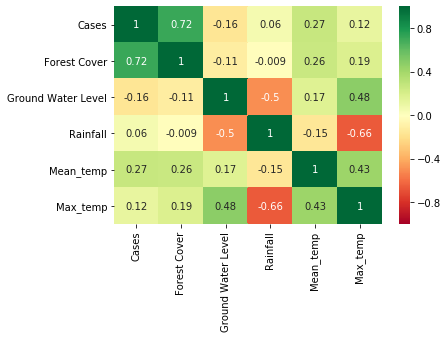

In [284]:
# Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(merged_filt2.corr(), annot=True, cmap='RdYlGn', center=0,vmin=-1.0,vmax=1.0)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 


In [293]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model


X=merged_filt2.drop(columns={'State','Cases'},axis=1).values
y=merged_filt2['Cases'].values 


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)
reg_all=linear_model.LinearRegression()
reg_all.fit(X_train,y_train)
reg_all.score(X_test,y_test)

-0.5359982963026397

In [294]:
len(merged_filt2)

24

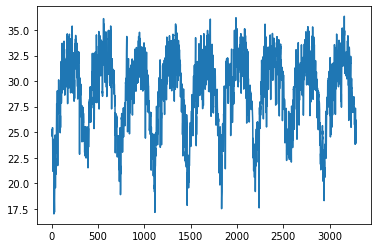

In [437]:
file1 = pd.read_csv('Temp_grids_in_India.csv')
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016]
name = 'Assam'

lat = file1['Lat'][file1['NAME_1']==name]
lon = file1['Long'][file1['NAME_1']==name]

text = []
for i in lat.index:
    text.append('('+str(lat[i])+', '+str(lon[i])+')')
temp=[]; count=0
for col in text:
    temp.append([])
    for year in years:
        file2 = pd.read_csv('temp_max_usable_corrected_copy_'+str(year)+'.csv')
        temp[count].extend(file2[col])
    count+=1
mean_temp = np.mean(temp,axis=0)
plt.plot(mean_temp)

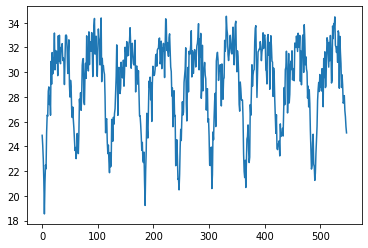

In [447]:
from scipy.stats import binned_statistic
mean_temp_bin = mean_temp.reshape(-1, 6).mean(axis=1)
plt.plot(mean_temp_bin)

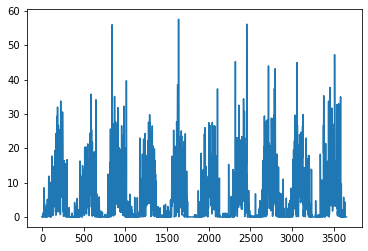

In [519]:
file1 = pd.read_csv('Rainfall_Grids_in_India.csv')
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
name = 'Assam'

lat = file1['LAT'][file1['NAME_1']==name]
lon = file1['LONG'][file1['NAME_1']==name]

text = []
for i in lat.index:
    text.append('('+str(lat[i])+', '+str(lon[i])+')')
rainfall=[]; count=0
for col in text:
    rainfall.append([])
    for year in years:
        file2 = pd.read_csv('rainfall_full_'+str(year)+'.csv')
        rainfall[count].extend(file2[col])
    count+=1
mean_rainfall = np.mean(rainfall,axis=0)
plt.plot(mean_rainfall)

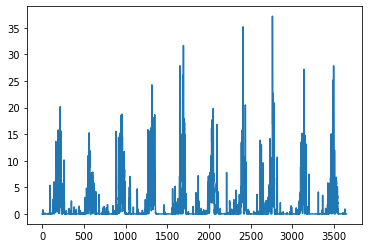

In [520]:
file1 = pd.read_csv('Rainfall_Grids_in_India.csv')
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
name = 'Rajasthan'

lat = file1['LAT'][file1['NAME_1']==name]
lon = file1['LONG'][file1['NAME_1']==name]

text = []
for i in lat.index:
    text.append('('+str(lat[i])+', '+str(lon[i])+')')
rainfall=[]; count=0
for col in text:
    rainfall.append([])
    for year in years:
        file2 = pd.read_csv('rainfall_full_'+str(year)+'.csv')
        rainfall[count].extend(file2[col])
    count+=1
mean_rainfall = np.mean(rainfall,axis=0)
plt.plot(mean_rainfall)